In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

df= pd.read_csv(r"C:\Users\habib\OneDrive\المستندات\Graduation Project\GRAD-proj-DEPI\DS2\Cardiovascular Diseases Risk Prediction Dataset export 2025-10-15 21-12-56.csv")
print(display(df.head()))

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150,32.66,14.54,Yes,0,30,16,12
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165,77.11,28.29,No,0,30,0,4
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163,88.45,33.47,No,4,12,3,16
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180,93.44,28.73,No,0,30,30,8
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191,88.45,24.37,Yes,0,8,4,0


None


In [2]:
print("Shape:", df.shape)
print("\nData types:\n", df.dtypes)

Shape: (308854, 19)

Data types:
 General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                       int64
Weight_(kg)                     float64
BMI                             float64
Smoking_History                  object
Alcohol_Consumption               int64
Fruit_Consumption                 int64
Green_Vegetables_Consumption      int64
FriedPotato_Consumption           int64
dtype: object


In [ ]:
print(df.describe())

         Height_(cm)    Weight_(kg)            BMI  Alcohol_Consumption  \
count  308854.000000  308854.000000  308854.000000        308854.000000   
mean      170.615249      83.588655      28.626211             5.096366   
std        10.658026      21.343210       6.522323             8.199763   
min        91.000000      24.950000      12.020000             0.000000   
25%       163.000000      68.040000      24.210000             0.000000   
50%       170.000000      81.650000      27.440000             1.000000   
75%       178.000000      95.250000      31.850000             6.000000   
max       241.000000     293.020000      99.330000            30.000000   

       Fruit_Consumption  Green_Vegetables_Consumption  \
count      308854.000000                 308854.000000   
mean           29.835200                     15.110441   
std            24.875735                     14.926238   
min             0.000000                      0.000000   
25%            12.000000          

In [4]:
print(df.describe(include='object'))

       General_Health               Checkup Exercise Heart_Disease  \
count          308854                308854   308854        308854   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           110395                239371   239381        283883   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count       308854       308854     308854   308854    308854  308854   
unique           2            2          2        4         2       2   
top             No           No         No       No        No  Female   
freq        278860       278976     246953   259141    207783  160196   

       Age_Category Smoking_History  
count        308854          308854  
unique           13               2  
top           65-69              No  
freq          33434          183590  


In [5]:
# Strip whitespace from string columns and standardize Yes/No capitalization
for c in df.select_dtypes(include="object").columns:
    df[c] = df[c].astype(str).str.strip()

yn_cols = ["Exercise","Heart_Disease","Skin_Cancer","Other_Cancer",
           "Depression","Diabetes","Arthritis","Smoking_History"]
yn_cols = [c for c in yn_cols if c in df.columns]
for c in yn_cols:
    df[c] = df[c].str.title().replace({"Nan":"NaN"})  # normalize case

# Show unique levels for key categoricals
cats_preview = ["General_Health","Checkup","Exercise","Sex","Age_Category","Smoking_History"]
for c in cats_preview:
    if c in df.columns:
        print(f"\n{c} unique:", sorted(df[c].dropna().unique())[:30])
        print(df[c].value_counts(dropna=False).head(10))



General_Health unique: ['Excellent', 'Fair', 'Good', 'Poor', 'Very Good']
General_Health
Very Good    110395
Good          95364
Excellent     55954
Fair          35810
Poor          11331
Name: count, dtype: int64

Checkup unique: ['5 or more years ago', 'Never', 'Within the past 2 years', 'Within the past 5 years', 'Within the past year']
Checkup
Within the past year       239371
Within the past 2 years     37213
Within the past 5 years     17442
5 or more years ago         13421
Never                        1407
Name: count, dtype: int64

Exercise unique: ['No', 'Yes']
Exercise
Yes    239381
No      69473
Name: count, dtype: int64

Sex unique: ['Female', 'Male']
Sex
Female    160196
Male      148658
Name: count, dtype: int64

Age_Category unique: ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
Age_Category
65-69    33434
60-64    32418
70-74    31103
55-59    28054
50-54    25097
80+      22271
40-44    21595
45-49

In [6]:
CAT = [c for c in [
    "General_Health","Checkup","Exercise","Skin_Cancer","Other_Cancer",
    "Depression","Diabetes","Arthritis","Sex","Age_Category","Smoking_History",
    "BMI_Category"  # include only if present
] if c in df.columns]

NUM = [c for c in [
    "Height_(cm)","Weight_(kg)","BMI",
    "Alcohol_Consumption","Fruit_Consumption",
    "Green_Vegetables_Consumption","FriedPotato_Consumption"
] if c in df.columns]

print("CAT:", CAT)
print("NUM:", NUM)


CAT: ['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Smoking_History']
NUM: ['Height_(cm)', 'Weight_(kg)', 'BMI', 'Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


Missingness (%):
 General_Health                  0.0
Checkup                         0.0
Exercise                        0.0
Skin_Cancer                     0.0
Other_Cancer                    0.0
Depression                      0.0
Diabetes                        0.0
Arthritis                       0.0
Sex                             0.0
Age_Category                    0.0
Smoking_History                 0.0
Height_(cm)                     0.0
Weight_(kg)                     0.0
BMI                             0.0
Alcohol_Consumption             0.0
Fruit_Consumption               0.0
Green_Vegetables_Consumption    0.0
FriedPotato_Consumption         0.0
dtype: float64


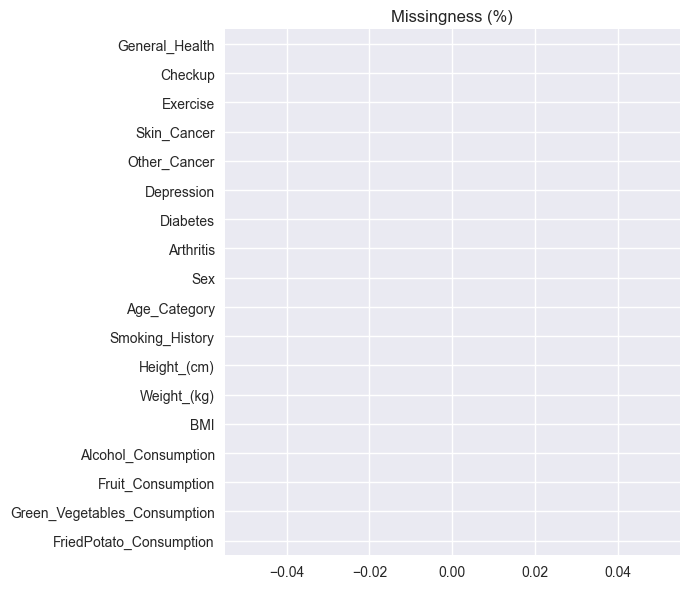

In [ ]:
miss = df[CAT + NUM].isna().mean().sort_values(ascending=False)
print("Missingness (%):\n", (miss*100).round(2))

ax = (miss*100).plot(kind="barh", figsize=(7,6), title="Missingness (%)")
plt.gca().invert_yaxis(); plt.tight_layout(); plt.show()


In [11]:
df_eda = df.copy()

# full-row duplicates
dup_count = df_eda.duplicated().sum()
print("Full-row duplicates:", dup_count)

# duplicates by a subset (if an id or person key exists)
key_cols = [c for c in ["id","PersonID","RecordID"] if c in df_eda.columns]
if key_cols:
    print("Duplicate IDs:", df_eda.duplicated(subset=key_cols).sum())

# drop exact duplicates (keep first) for EDA views; keep original df untouched
df_eda_nodup = df_eda.drop_duplicates()


Full-row duplicates: 80
